# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](./Images/farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [2]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("./Dataset/soil_measures.csv")

crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


No missing values

In [21]:
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [43]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

kf = KFold(n_splits=6, random_state=12, shuffle=True)

label_e = LabelEncoder()
s_scaler = StandardScaler()

steps = [
    ("scaler", s_scaler),
    ("logreg", LogisticRegression())
]
pipeline = Pipeline(steps)

parameters = {
    "logreg__solver": ["newton-cg", "saga", "lbfgs"],
    "logreg__C": np.linspace(0.001, 1, 20),
    "logreg__max_iter": [100, 200, 500]
    }

X = crops.drop('crop', axis=1)
y = label_e.fit_transform(crops['crop'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)

print(cv.best_score_, "\n", cv.best_params_)

0.6573863636363636 
 {'logreg__C': np.float64(0.9474210526315789), 'logreg__max_iter': 100, 'logreg__solver': 'lbfgs'}


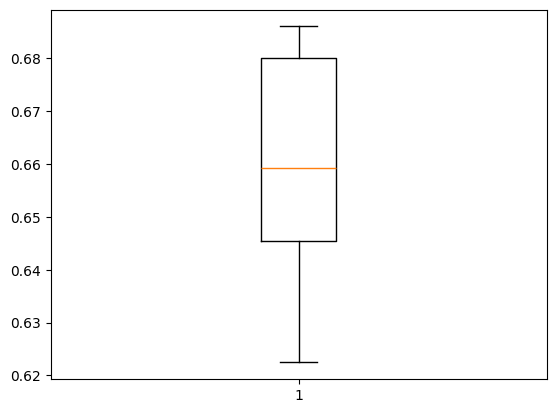

In [44]:
model = LogisticRegression(C=0.95)
X_train_scaled = s_scaler.fit_transform(X_train)
cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)

plt.boxplot(cv_results)
plt.show()

In [64]:
best_score = 0
best_feature = None

for feature in X.columns:
    X_feature = X[[feature]]
    
    X_train_scaled = s_scaler.fit_transform(X_feature)
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    model = LogisticRegression()
    cv_scores = cross_val_score(model, X_train_scaled, y, cv=kf, scoring='roc_auc_ovr')

    mean_score = cv_scores.mean()
    
    print(f"Feature: {feature}, CV Accuracy: {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_feature = feature



Feature: N, CV Accuracy: 0.8201
Feature: P, CV Accuracy: 0.8807
Feature: K, CV Accuracy: 0.8892
Feature: ph, CV Accuracy: 0.7043


In [67]:
best_predictive_feature = {}

best_predictive_feature[best_feature] = best_score
best_predictive_feature


{'K': np.float64(0.8892449197887408)}